<a href="https://www.kaggle.com/code/andresoghomonians/global-impact-of-2008-recession?scriptVersionId=135957651" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Global Impact of the 2008 Recession
By: Andre Soghomonians

## Table of Contents
#### [1. Introduction](#intro)
#### [2. Pulling the Data](#pulling_data)
#### [3. Economic Data](#economic_data)
#### [4. Crime Data](#crime_data)
#### [5. Conclusion](#conclusion)

## 1. Introduction <a id="intro"></a>

This project will look at how the world was impacted by the 2008 recession with the two primary focuses will be on the economy and crime. Each country's GDP growth rate will serve as a proxy for their economic condition and intentional homicide rate per 100,000 will be used as a measure for crime rate. The scope of the analysis will be both on a regional and national level. The data comes from the dataset ["World Development Indicators"](https://www.kaggle.com/datasets/psycon/world-development-indicators) uploaded by Kaggle user Batucan Senkal. It contains a multitude of economic indicators from every country starting in 1960.  

## 2. Pulling the Data <a id="pulling_data"></a>

In [1]:
# Libraries 
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats

In [2]:
# Connecting to SQL
db_path = '/kaggle/input/world-development-indicators/indicators.sqlite'
conn = sql.connect(db_path)
print('Connected')

Connected


In [3]:
# Listing all tables in dataset 
table = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name", conn)
print(table)

           name
0       Country
1  CountryNotes
2     Footnotes
3    Indicators
4        Series
5   SeriesNotes


In [4]:
# Indicator table
query = 'SELECT * FROM indicators;'
indicators = pd.read_sql_query(query, conn)
indicators.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [5]:
# Country table
query = 'SELECT * FROM Country;'
country_info = pd.read_sql_query(query, conn)
country_info.head(10)

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",,2013/14,,2013,2000
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011,2013,2006
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",,,2010,2013,2001
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,,East Asia & Pacific,Upper middle income,AS,...,,,2010,,,Yes,2007,,,
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,,Europe & Central Asia,High income: nonOECD,AD,...,,,2011. Population data compiled from administra...,,,Yes,,,2006,
5,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,Budgetary central government,General Data Dissemination System (GDDS),2014,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008/09",,2015,,,2005
6,ATG,Antigua and Barbuda,Antigua and Barbuda,Antigua and Barbuda,AG,East Caribbean dollar,April 2012 database update: Based on official ...,Latin America & Caribbean,High income: nonOECD,AG,...,Budgetary central government,General Data Dissemination System (GDDS),2011,,,Yes,2007,,2013,2005
7,ARB,Arab World,Arab World,Arab World,1A,,Arab World aggregate. Arab World is composed o...,,,1A,...,,,,,,,,,,
8,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,The base year has changed to 2004.,Latin America & Caribbean,High income: nonOECD,AR,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2011/12","Integrated household survey (IHS), 2012",Yes,2013,2002,2013,2011
9,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,,Europe & Central Asia,Lower middle income,AM,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2010","Integrated household survey (IHS), 2012",Yes,2013/14,2008,2013,2012


## 3. Economic Data <a id="economic_data"></a>

I decided to use GDP growth rate to measure each of their economies because it was one of the most available variables in the dataset. If I were to use raw GDP instead, the values would have been much larger which would make it more difficult to interpret. Although GDP growth rate does not capture every aspect of a nation's economy, there has been extensive research that has shown it is correlated with other important indicators that measure quality of life such as literacy rate and infant mortality rate among others. 

In [6]:
# Creating table of GDP values by region
query = """
        SELECT c.Region, i.Year, AVG(i.Value) AS GDP_Growth
        FROM Indicators as i
        LEFT JOIN Country as c ON i.CountryCode = c.CountryCode
        WHERE i.IndicatorCode = "NY.GDP.MKTP.KD.ZG" AND c.Region != ''
        GROUP BY i.Year, c.Region
        """
gdp_data = pd.read_sql_query(query, conn)
gdp_data.head(10)

,Region,Year,GDP_Growth
0,East Asia & Pacific,1961,2.928777
1,Europe & Central Asia,1961,5.403870
2,Latin America & Caribbean,1961,5.237807
3,Middle East & North Africa,1961,2.922810
4,North America,1961,3.381097
5,South Asia,1961,4.419129
6,Sub-Saharan Africa,1961,2.516917
7,East Asia & Pacific,1962,4.078484
8,Europe & Central Asia,1962,4.873420
9,Latin America & Caribbean,1962,5.834027


In [7]:
# Giving each region its own column
gdp = pd.pivot(gdp_data, index = 'Year', columns = 'Region', values = 'GDP_Growth').reset_index()
gdp.head()

Region,Year,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
0,1961,2.928777,5.403870,5.237807,2.922810,3.381097,4.419129,2.516917
1,1962,4.078484,4.873420,5.834027,9.267897,5.895593,3.719071,5.117477
2,1963,7.360783,5.528608,3.889551,8.798937,3.550592,3.727830,3.407647
3,1964,5.622965,6.573064,6.678619,5.480712,7.869819,7.482887,4.626620
4,1965,6.827285,4.878703,5.059870,44.893175,5.932182,2.144726,4.831957


In [8]:
# Summary statistics of each region
gdp.loc[:, gdp.columns != "Year"].describe()

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,4.876627,3.309544,3.648226,6.298254,3.073927,4.972664,4.011312
std,1.936882,2.575628,1.700496,6.432588,2.344976,1.916489,1.791149
min,0.051154,-5.444245,-1.359885,0.230872,-3.590393,-2.201261,0.070815
25%,3.787292,2.269673,2.884011,2.903615,2.177695,4.058241,2.980149
50%,4.674566,3.962548,3.685399,5.061896,3.286427,5.220009,4.108560
75%,5.894457,4.994974,4.804321,7.850863,4.171127,5.819369,5.018135
max,10.131076,6.573064,6.678619,44.893175,9.149534,9.294764,10.157318


From the summary statistics of the entire dataset, we can see that the Middle East & North Africa has been the most volatile in terms of GDP growth. Although they have the highest mean growth, their standard deviation is by far the highest at 6.433%. The next closest is Europe & Central Asia at 2.576%. The Middle East & North Africa also have the biggest range, with their maximum growth being 44.893% and lowest being 0.231%.

In [9]:
# Color codes for regions
region_col = {'East Asia & Pacific': 'firebrick', 'Europe & Central Asia': 'darkkhaki', 
           'Latin America & Caribbean': 'royalblue', 'Middle East & North Africa': 'darkorange',
           'North America': 'forestgreen', 'South Asia': 'darkmagenta', 'Sub-Saharan Africa': 'sienna'}

# Color codes for countries
country_col = {}
for index, row in country_info.iterrows():
    if row['Region'] == 'East Asia & Pacific':
        country_col[row['TableName']] = 'firebrick'
    elif row['Region'] == 'Europe & Central Asia':
        country_col[row['TableName']] = 'darkkhaki'
    elif row['Region'] == 'Latin America & Caribbean':
        country_col[row['TableName']] = 'royalblue'
    elif row['Region'] == 'Middle East & North Africa':
        country_col[row['TableName']] = 'darkorange'
    elif row['Region'] == 'North America':
        country_col[row['TableName']] = 'forestgreen'
    elif row['Region'] == 'South Asia':
        country_col[row['TableName']] = 'darkmagenta'
    elif row['Region'] == 'Sub-Saharan Africa':
        country_col[row['TableName']] = 'sienna'

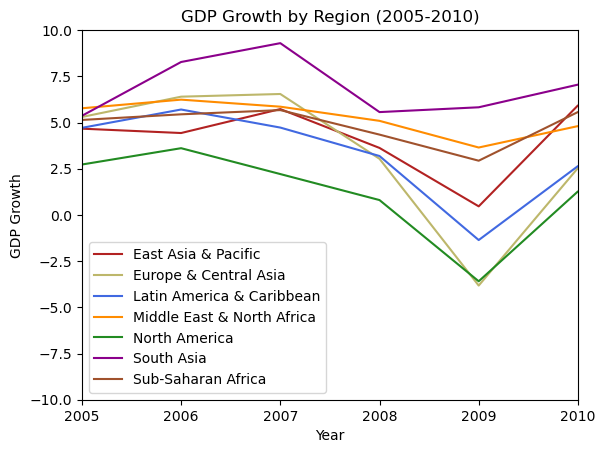

In [10]:
# Visualizing differences by region

for i, j in region_col.items():
    plt.plot(gdp['Year'], gdp[i], color = j, label = i)
plt.xlabel('Year')
plt.ylabel('GDP Growth')
plt.title('GDP Growth by Region (2005-2010)')
plt.xlim(2005,2010)
plt.ylim(-10,10)
plt.legend(loc='lower left')
plot1 = plt.show()

As expected, each region saw a decrease in growth during the recession. However, only three saw their growth fall below 0. Another interesting fact is the most volatile region during the entire dataset, the Middle East & North Africa, saw little change in comparison to other regions. 

In [11]:
# Pulling each country's lowest year of GDP growth
query = """
        SELECT i.CountryName, c.CountryCode, i.Year, MIN(i.Value) AS MinGrowth
        FROM Indicators as i
        LEFT JOIN Country as c ON i.CountryCode = c.CountryCode
        WHERE i.IndicatorCode = "NY.GDP.MKTP.KD.ZG" AND c.Region != ''
        GROUP BY i.CountryName
        """
min_growth = pd.read_sql_query(query, conn)
min_growth.head(10)

,CountryName,CountryCode,Year,MinGrowth
0,Afghanistan,AFG,2004,1.055556
1,Albania,ALB,1991,-29.588998
2,Algeria,DZA,1962,-19.685042
3,Andorra,ADO,2008,-8.594256
4,Angola,AGO,1993,-24.700000
5,Antigua and Barbuda,ATG,2009,-12.036015
6,Argentina,ARG,2002,-10.894485
7,Armenia,ARM,1992,-41.800003
8,Aruba,ABW,2008,-6.881302
9,Australia,AUS,1983,-2.230600


In [12]:
# Calculating the proportion of countries who suffered their lowest growth during the recession. 
recession_impact = min_growth[(min_growth['Year'] > 2006) & (min_growth['Year'] < 2010)].sort_values(by = 'MinGrowth')
prop = round((len(recession_impact.index)/len(min_growth.index)) * 100, 2)
print('Proportion of Countries Hit Hardest by Recession:', prop, '%')
recession_impact.head(10)

Proportion of Countries Hit Hardest by Recession: 20.49 %


,CountryName,CountryCode,Year,MinGrowth
204,Zimbabwe,ZWE,2008,-17.668947
107,Lithuania,LTU,2009,-14.814163
59,Estonia,EST,2009,-14.724402
101,Latvia,LVA,2009,-14.348926
5,Antigua and Barbuda,ATG,2009,-12.036015
58,Eritrea,ERI,2008,-9.783030
3,Andorra,ADO,2008,-8.594256
62,Finland,FIN,2009,-8.269037
163,Slovenia,SVN,2009,-7.797290
24,Botswana,BWA,2009,-7.652310


In all countries in the dataset, 20.49% of them experienced their lowest GDP growth during the recession. Given the dataset spans all the way back to 1960, I find this number to be somewhat surprising. That time span includes siginificant historical events such as decolonization, multiple wars, the fall of the Soviet Union, and many more. I would have expected the proportion to be slightly lower. 

In [13]:
# Top 10 Countries hit hardest by Recession
query = """
        SELECT i.CountryName, c.CountryCode, i.Year, MIN(i.Value) AS MinGrowth
        FROM Indicators as i
        LEFT JOIN Country as c ON i.CountryCode = c.CountryCode
        WHERE i.IndicatorCode = "NY.GDP.MKTP.KD.ZG" AND c.Region != '' AND i.Year BETWEEN 2007 AND 2009
        GROUP BY i.CountryName
        ORDER BY MinGrowth
        LIMIT 10"""
top_10 = pd.read_sql_query(query, conn)
top_10.head(10)

,CountryName,CountryCode,Year,MinGrowth
0,Zimbabwe,ZWE,2008,-17.668947
1,Lithuania,LTU,2009,-14.814163
2,Ukraine,UKR,2009,-14.800000
3,Estonia,EST,2009,-14.724402
4,Latvia,LVA,2009,-14.348926
5,Armenia,ARM,2009,-14.149989
6,Antigua and Barbuda,ATG,2009,-12.036015
7,Palau,PLW,2009,-10.742842
8,Eritrea,ERI,2008,-9.783030
9,West Bank and Gaza,WBG,2008,-8.632433


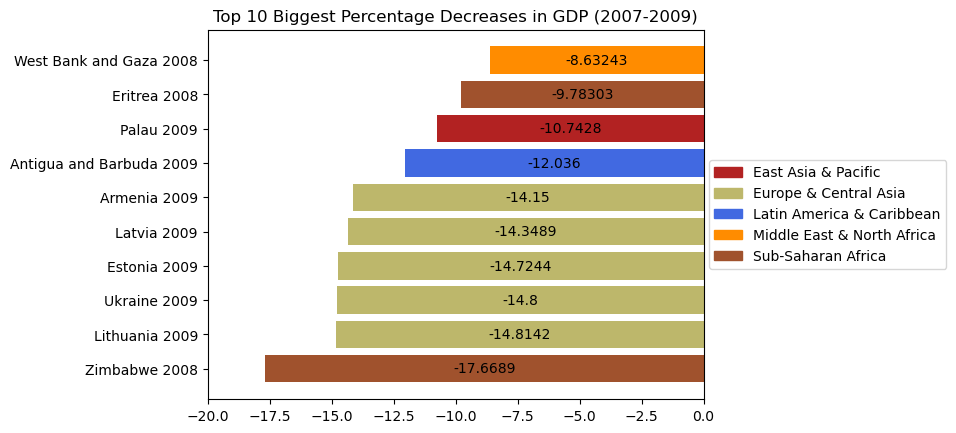

In [14]:
# Graph of the top 10 countries impacted the hardest

# Pulling necessary colors
colors = {}
for index, row in top_10.iterrows():
    if top_10['CountryName'][index] in country_col: 
        colors[row['CountryName']] = country_col.get(row['CountryName'])

# Creating the graph
plot = plt.barh(y = 'CountryName', width = 'MinGrowth', data = top_10, color = [colors.get(i) for i in top_10['CountryName']])    
plt.bar_label(plot, label_type = 'center')
plt.xlim(-20,0)
plt.title('Top 10 Biggest Percentage Decreases in GDP (2007-2009)')

# yticks
top_10['Country and Year'] = top_10['CountryName'] + " " + top_10['Year'].astype(str)
plt.yticks(range(len(top_10)), top_10['Country and Year'])

# Creating the legend
titles = []
for region, color in region_col.items():
    titles.append(mpatches.Patch(color=color, label=region))
titles = titles[:4] + titles[6:]
plt.legend(handles = titles, bbox_to_anchor = (1.25,0.5), loc = 'center')

plt.show()

When focusing the scope to the national level, it becomes apparent how catastrophic the effect was for specific countries. Zimbabwe suffered greatly with a 17.67% decrease in their GDP in 2008. The next five with the lowest GDP growth are all countries in eastern Europe, while the rest were in other parts of the world. When comparing this to the regional level, it is surprising to see none from North America since it suffered around the same as Europe & Central Asia. 

## 4. Crime Data <a id="crime_data"></a>

Intentional homicide rate was selected because there is empirical evidence connecting crime rate to the economic status of a country. It is also one of the few crime statistics available in the dataset. 

In [15]:
# Pulling regional homicide rate data
query = """
        SELECT c.Region, i.Year, AVG(i.Value) AS HomRate
        FROM Indicators as i
        LEFT JOIN Country as c ON i.CountryCode = c.CountryCode
        WHERE i.IndicatorCode = "VC.IHR.PSRC.P5" AND c.Region != ''
        GROUP BY i.Year, c.Region
        """
hom_data = pd.read_sql_query(query, conn)
hom_data.head(10)

,Region,Year,HomRate
0,East Asia & Pacific,1995,2.568038
1,Europe & Central Asia,1995,4.975792
2,Latin America & Caribbean,1995,28.770534
3,Middle East & North Africa,1995,1.647253
4,North America,1995,4.974365
5,South Asia,1995,4.366263
6,Sub-Saharan Africa,1995,29.900886
7,East Asia & Pacific,1996,2.659019
8,Europe & Central Asia,1996,4.435393
9,Latin America & Caribbean,1996,27.700094


In [16]:
# Giving each region its own column
hom = pd.pivot(hom_data, index = 'Year', columns = 'Region', values = 'HomRate').reset_index()
hom.head()

Region,Year,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
0,1995,2.568038,4.975792,28.770534,1.647253,4.974365,4.366263,29.900886
1,1996,2.659019,4.435393,27.700094,3.272371,5.239638,5.663268,28.032780
2,1997,3.147221,5.668615,26.674944,2.114247,3.885576,4.605491,25.947619
3,1998,4.061690,4.487092,21.194880,1.690848,2.610198,4.901112,22.992143
4,1999,4.132757,4.551144,20.581001,1.726167,3.447007,4.494617,17.856053


In [17]:
# Statistical summary of each region
hom.loc[:, hom.columns != "Year"].describe()

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,3.276237,3.501834,22.238991,2.719965,4.006150,4.267176,14.816198
std,0.496100,0.971510,3.290382,1.280293,1.065819,0.678706,7.709197
min,2.362355,1.940849,17.326080,1.647253,2.356511,2.455347,6.725775
25%,2.962765,2.944371,19.967501,1.847176,3.192458,4.070023,8.755620
50%,3.242083,3.312482,21.194880,2.283819,3.918366,4.337108,12.552652
75%,3.638557,4.119888,24.350376,3.024876,4.895881,4.550054,20.424098
max,4.132757,5.668615,28.770534,6.638784,5.947539,5.663268,29.900886


Unsurprisingly, Latin America & Caribbean has by far the highest average intentional homicide rate. Countries such as Mexico, Brazil, and Colombia are infamous for how rampant organized crime has been for them. Sub-Saharan Africa also has a high average and is even more volatile than Latin America & Caribbean. Their standard deviation of 7.71 is by far the highest, demonstrating the effects of  overall instability within the region. 

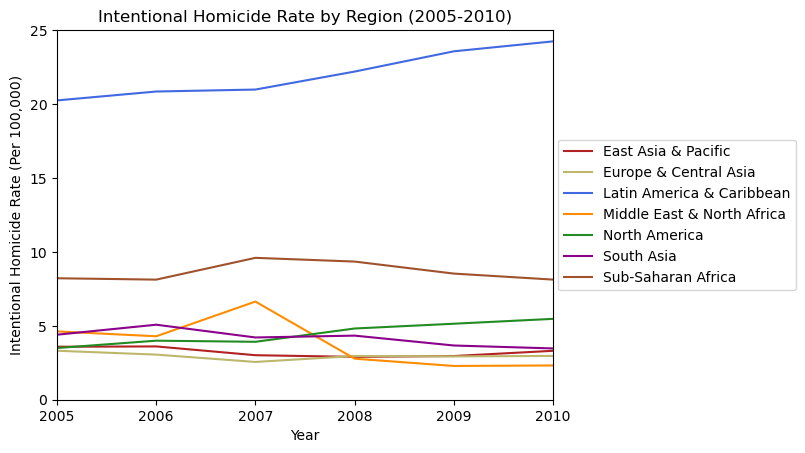

In [18]:
# Graph of homicide rate
for i, j in region_col.items():
    plt.plot(hom['Year'], hom[i], color = j, label = i)
plt.xlabel('Year')
plt.ylabel('Intentional Homicide Rate (Per 100,000)')
plt.title('Intentional Homicide Rate by Region (2005-2010)')
plt.xlim(2005,2010)
plt.ylim(0, 25)
plt.legend(bbox_to_anchor=(1.25, 0.5), loc='center')
plt.show()

From the graph we can see how the recession was nowhere near as significant on homicide rates in comparison to GDP growth rate. All regions remained around the same before and after it started. The two exceptions are Latin America & Caribbean as well as the Middle East & North Africa. As previously discussed, Latin America & Caribbean already had a high rate, so it increasing is not too big of a surprise. Another standout takeaway from the graph is the Middle East & North Africa experiencing a sharp decline compared to the others.

Now we know how little intentional homicide rate was influenced, we can expect there to be a low correlation between it and GDP Growth. Below is the correlation coefficient between the two variables. It is important to note that there is much more data for GDP growth rate. It spans all the way back to 1960 while intentional homicide rate only goes as far as 1995. 

In [19]:
# Yearly global GDP growth rate average 
query = """
        SELECT i.Year, i.CountryName AS Country, AVG(i.VALUE) AS GDPGrowth
        FROM Indicators as i
        LEFT JOIN Country as c ON i.CountryCode = c.CountryCode
        WHERE i.IndicatorCode = "NY.GDP.MKTP.KD.ZG" AND c.Region != ''
        GROUP BY i.Year, i.CountryName
        """
gdp_global = pd.read_sql_query(query, conn)
gdp_global.head()


,Year,Country,GDPGrowth
0,1961,Algeria,-13.605441
1,1961,Argentina,5.427843
2,1961,Australia,2.475929
3,1961,Austria,5.537979
4,1961,"Bahamas, The",10.667097


In [20]:
# Yearly global intentional homicide rate average
query = """
        SELECT i.Year, i.CountryName AS Country, AVG(i.Value) AS HomRate
        FROM Indicators as i
        LEFT JOIN Country as c ON i.CountryCode = c.CountryCode
        WHERE i.IndicatorCode = "VC.IHR.PSRC.P5" AND c.Region != ''
        GROUP BY i.Year, i.CountryName
        """
hom_global = pd.read_sql_query(query, conn)
hom_global.head()

,Year,Country,HomRate
0,1995,Albania,6.685552
1,1995,Argentina,7.812330
2,1995,Armenia,3.598938
3,1995,Australia,1.799274
4,1995,Austria,1.033315


In [21]:
# Merging tables by Year
global_data = pd.merge(gdp_global, hom_global, how = 'inner', on = ["Year", "Country"])
global_data.head()

,Year,Country,GDPGrowth,HomRate
0,1995,Albania,13.300000,6.685552
1,1995,Argentina,-2.845210,7.812330
2,1995,Armenia,6.899998,3.598938
3,1995,Australia,3.879040,1.799274
4,1995,Austria,2.667984,1.033315


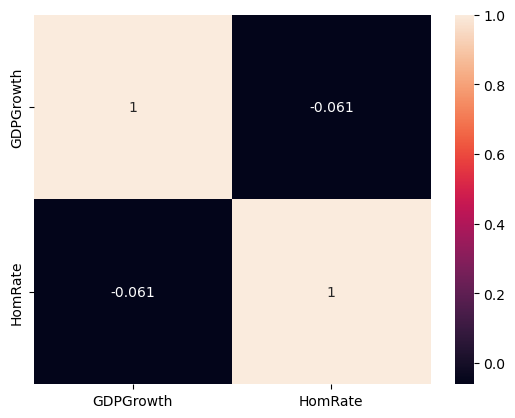

In [22]:
# Heatmap
corr = global_data[['GDPGrowth', 'HomRate']].corr()
sns.heatmap(corr, annot = True)
plt.show()

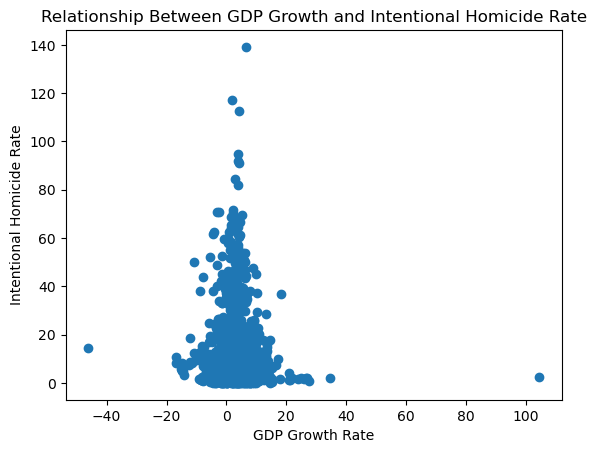

In [23]:
# Scatter plot
plt.scatter(x = global_data['GDPGrowth'], y = global_data['HomRate'])
plt.xlabel('GDP Growth Rate')
plt.ylabel('Intentional Homicide Rate')
plt.title('Relationship Between GDP Growth and Intentional Homicide Rate')
plt.show()

As expected from earlier analysis, the correlation coefficient between the two variables is exceptionally low. However, based on the scatterplot, it may be better to use an estimate for non-linear relationships instead. The relationship appears to be more logarithmic. 

In [24]:
# Spearman Rank Correlation Coefficient
stat = stats.spearmanr(global_data['GDPGrowth'], global_data['HomRate'])
print('Spearman Rank Correlation: ', round(stat.correlation, 3), '\nP-value: ', round(stat.pvalue, 3))

Spearman Rank Correlation:  0.051 
P-value:  0.018


When taking into account the possibility of a non-linearity, the relationship still appears to be weak. The value is around the same, but this time it is positive instead of negative. These results imply that my initial intuition may not directly apply to homicide rate but instead to other forms of crime. 

## 5. Conclusion <a id="conclusion"></a>

From the results, we can see the majority of the 2008 recession's impact was economic. Nations worldwide were impacted greatly, especially North America as well as Western Europe. The effect was nowhere near as great in regards to crime. There was little to no change for the majority of regions. It is possible there were other crime statistics that would have shown more significant results, as there are many more types of crimes than just intentional homicide. In the future, I would like to investigate which types of crimes are most dependent on a nation's economic condition. Maybe petty crimes such as pickpocketing become more common as people start struggling more financially. Another topic that would be interesting to investigate would be how different recessions vary in impact. Comparing the 2008 recession to the recession caused by COVID-19 may yield vastly different results. 